In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("output/processed_gym_members_data.csv")


In [3]:
X = df.drop('Experience_Level', axis=1)  
y = df['Experience_Level']


In [4]:
df.head(10)


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0.711632,-0.099794,180,157,60,1.283569,1313.0,12.6,3.5,4,3,30.20,True,False,False,True
1,46,0.062843,-1.541869,179,151,66,0.121623,883.0,33.9,2.1,4,2,32.00,False,True,False,False
2,32,-0.266394,-0.500370,167,122,54,-0.444452,677.0,33.4,2.3,4,2,24.71,False,False,False,False
3,25,-0.987808,-0.179909,190,164,56,-1.993713,532.0,28.8,2.1,3,1,18.41,True,False,True,False
4,38,-1.331570,0.541128,188,158,68,-1.844745,556.0,29.2,2.8,3,1,14.39,True,False,True,False
5,56,-0.755406,-0.340140,168,156,74,0.985634,1116.0,15.5,2.7,5,3,20.55,False,True,False,False
6,36,-0.159876,-0.019679,174,169,73,0.687699,1385.0,21.3,2.3,3,2,23.76,True,False,False,False
7,40,-0.188926,-1.702099,189,141,64,0.032243,895.0,30.6,1.9,3,2,30.57,False,False,False,False
8,28,2.328763,1.742857,185,127,52,-0.682800,719.0,28.9,2.6,4,2,32.34,True,False,True,False
9,28,1.365263,0.941704,169,136,64,0.032243,808.0,29.7,2.7,3,1,30.07,True,False,False,False


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [7]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = dt_model.predict(X_test)


In [9]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

In [10]:
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)


Decision Tree Classifier:
Accuracy: 0.85

Confusion Matrix:
 [[66 12  0]
 [17 58  0]
 [ 0  0 42]]

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.85      0.82        78
           2       0.83      0.77      0.80        75
           3       1.00      1.00      1.00        42

    accuracy                           0.85       195
   macro avg       0.87      0.87      0.87       195
weighted avg       0.85      0.85      0.85       195



In [11]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [13]:
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)



Random Forest Classifier:
Accuracy: 0.89

Confusion Matrix:
 [[63 15  0]
 [ 7 68  0]
 [ 0  0 42]]

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.81      0.85        78
           2       0.82      0.91      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.90      0.90       195
weighted avg       0.89      0.89      0.89       195



In [14]:
if accuracy_rf > accuracy_dt:
    print("\nRandom Forest performs better and is recommended for this problem.")
elif accuracy_dt > accuracy_rf:
    print("\nDecision Tree performs better and is recommended for this problem.")
else:
    print("\nBoth models have similar performance; choose based on other considerations like simplicity or interpretability.")



Random Forest performs better and is recommended for this problem.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [17]:
sns.set(style="whitegrid")


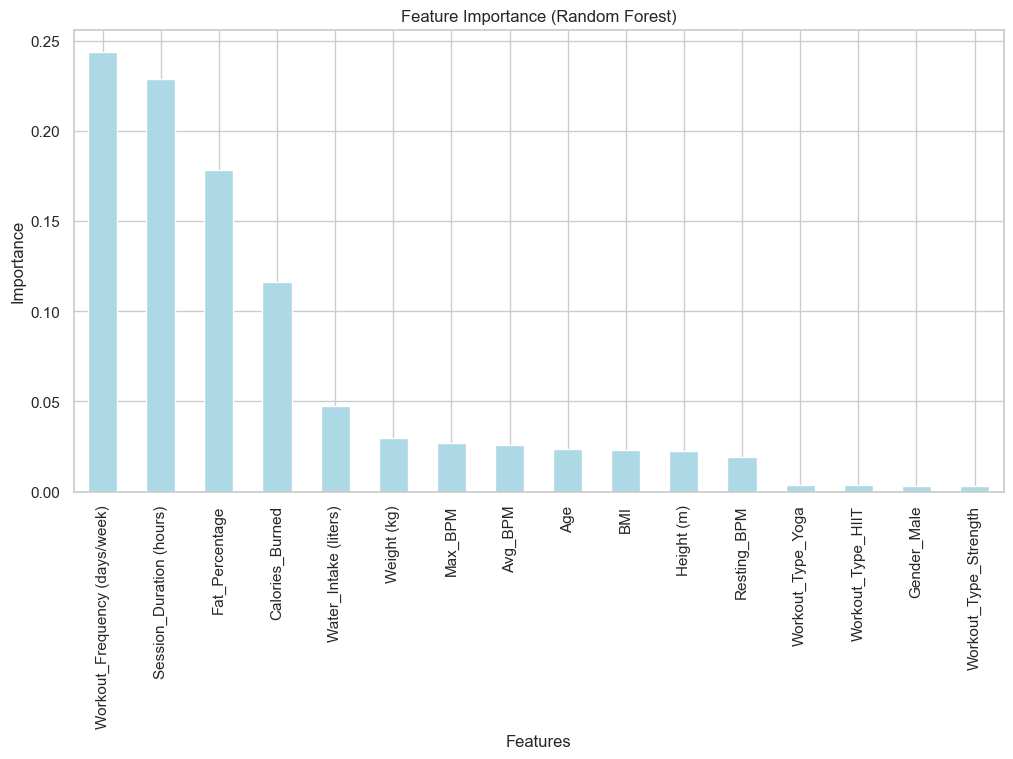

In [18]:
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Feature Importance (Random Forest)', color='lightblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

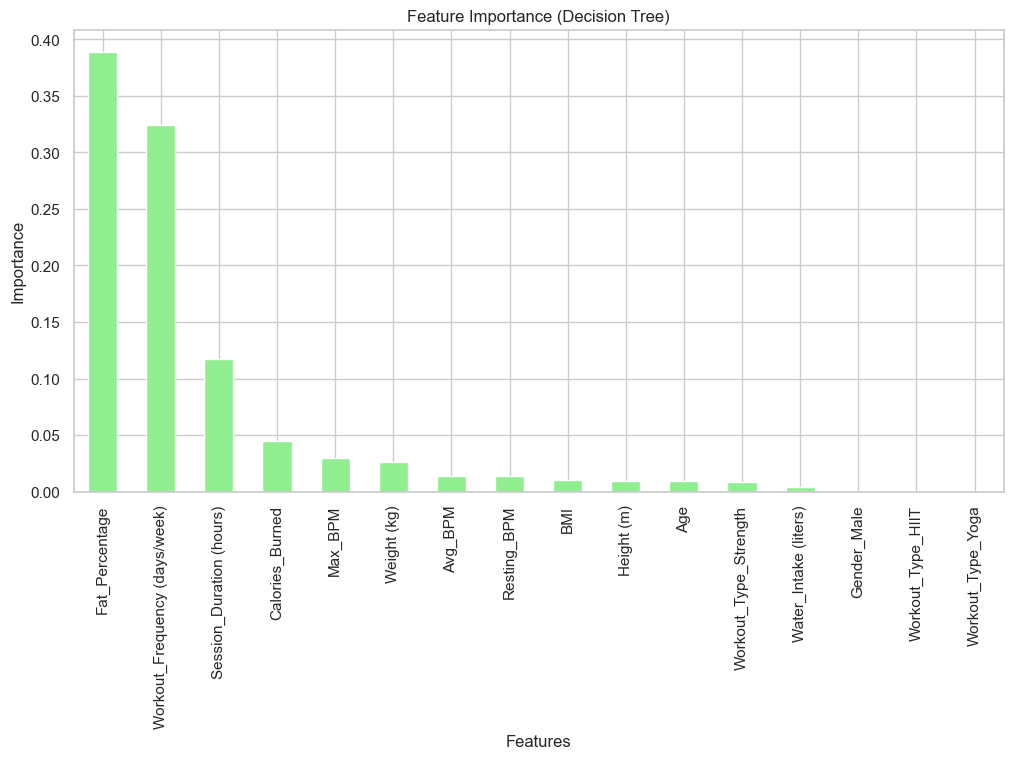

In [19]:
plt.figure(figsize=(12, 6))
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances_dt.plot(kind='bar', title='Feature Importance (Decision Tree)', color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

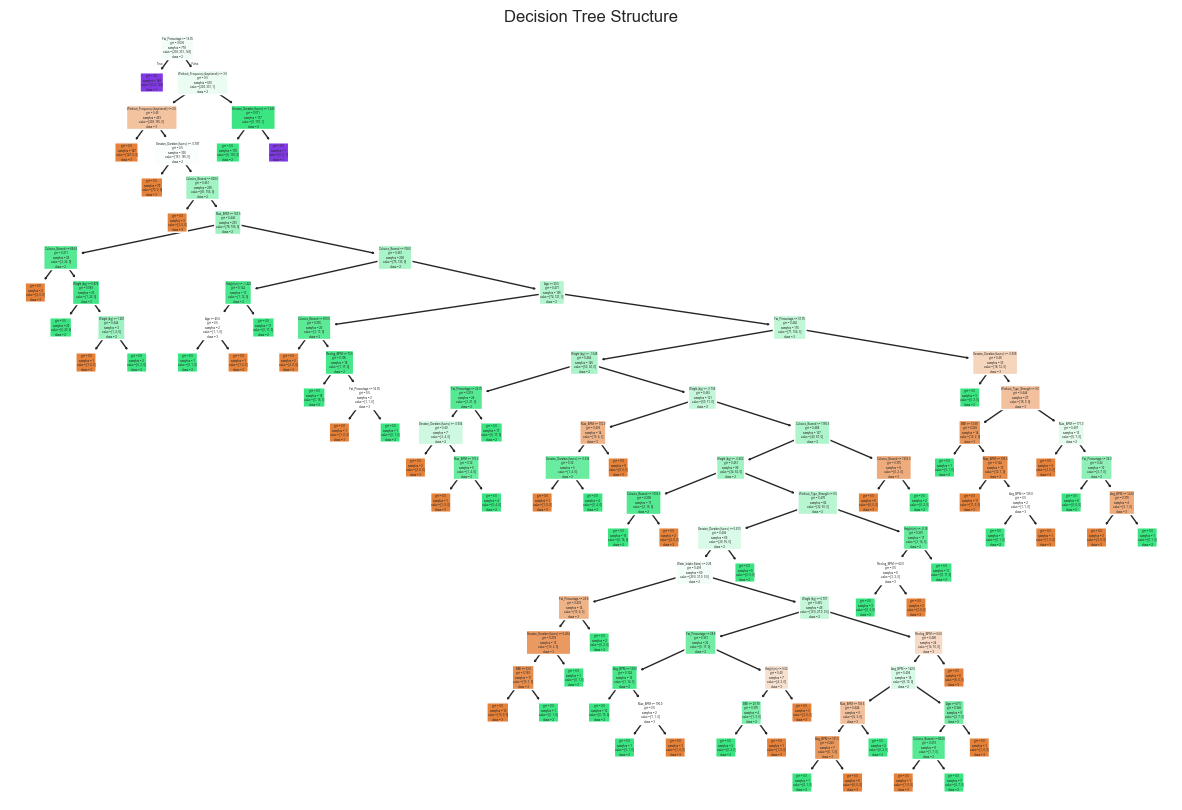

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],  
    filled=True,
    rounded=True
)
plt.title('Decision Tree Structure')
plt.show()


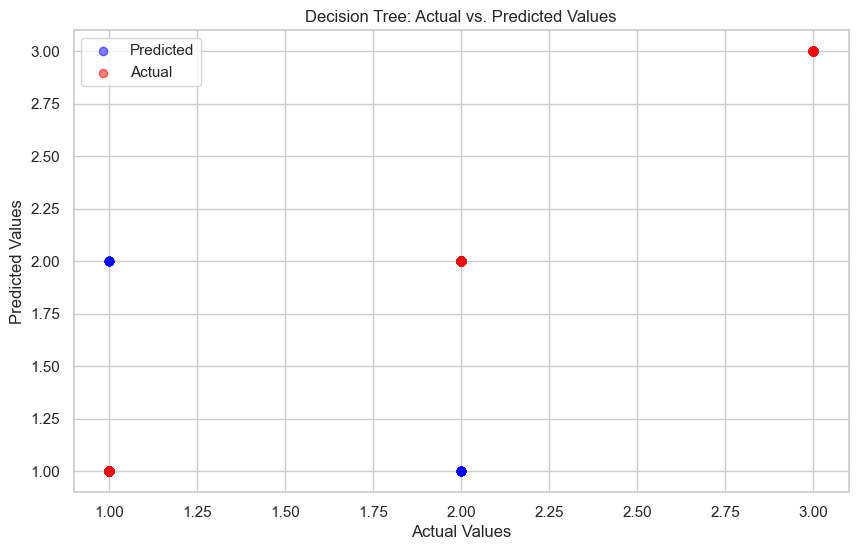

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)
plt.title('Decision Tree: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

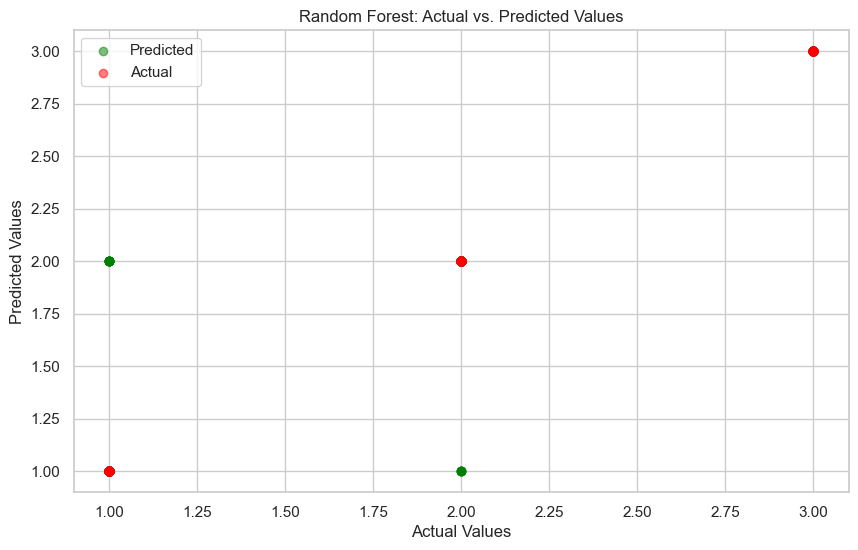

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)
plt.title('Random Forest: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Text(117.24999999999999, 0.5, 'Actual')

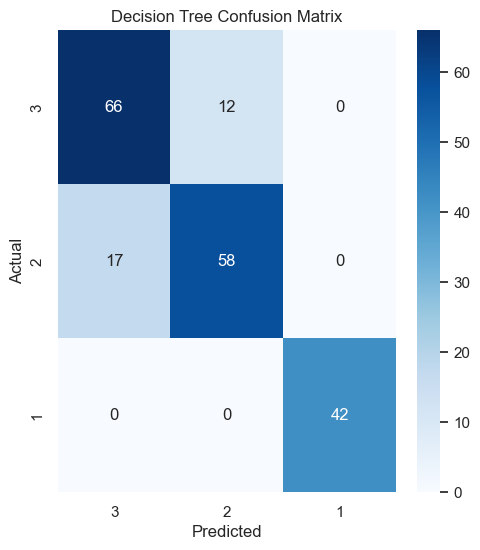

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=df['Experience_Level'].unique(), yticklabels=df['Experience_Level'].unique())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(317.7954545454545, 0.5, 'Actual')

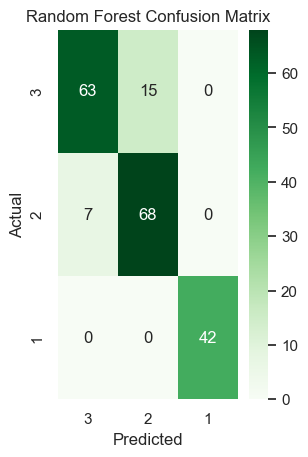

In [25]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=df['Experience_Level'].unique(), yticklabels=df['Experience_Level'].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>